# AirBNB: Seatle Smart Trip Tips

This post is for Data Scientist Nano degree first project. 

### 1. Business Understanding

Dataset: https://www.kaggle.com/airbnb/seattle/data 

Many US tourists visit Washington, Seatle and utilize AirBNB website for their bookings to get a nice place. It's Cheaper Than You Think. Airbnb rentals are not just ideal for luxury and business travelers, but also for budget travelers. All you have to do is take advantage of Airbnb's price range filter and you can rent a room, couch, space for a tent, or an entire apartment on even a backpackers budget.

From the data provided by AirBNB, I want to understand couple of things that would be covered by 3 questions:
1. Based on scores on the locations, which areas of Seattle is the best?
2. Which neighbourhood is the most affordable (for family/group travels) to pay for long (30 days) vacations? and which to avoid?
3. Looking at previous visitors experience, for who paid cleaning fees, did they actually got a cleaner room than other visitors who did not pay for it?

### 2. Data Understanding
Here I will try to understand the data provided by Kaggle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
# load the datasets into pandas dataframes
df_calendar = pd.read_csv('./calendar.csv') 
df_listings = pd.read_csv('./listings.csv')
df_reviews = pd.read_csv('./reviews.csv')

In [3]:
# view first 5 rows of the calendar dataframe
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# Summary about calendar DataFrame
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
# view first 5 rows of the listings dataframe
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
# Summary about listings DataFrame
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [7]:
# view first 5 rows of the reviews dataframe
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [8]:
# Summary about reviews DataFrame
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [9]:
# describe df_listings
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


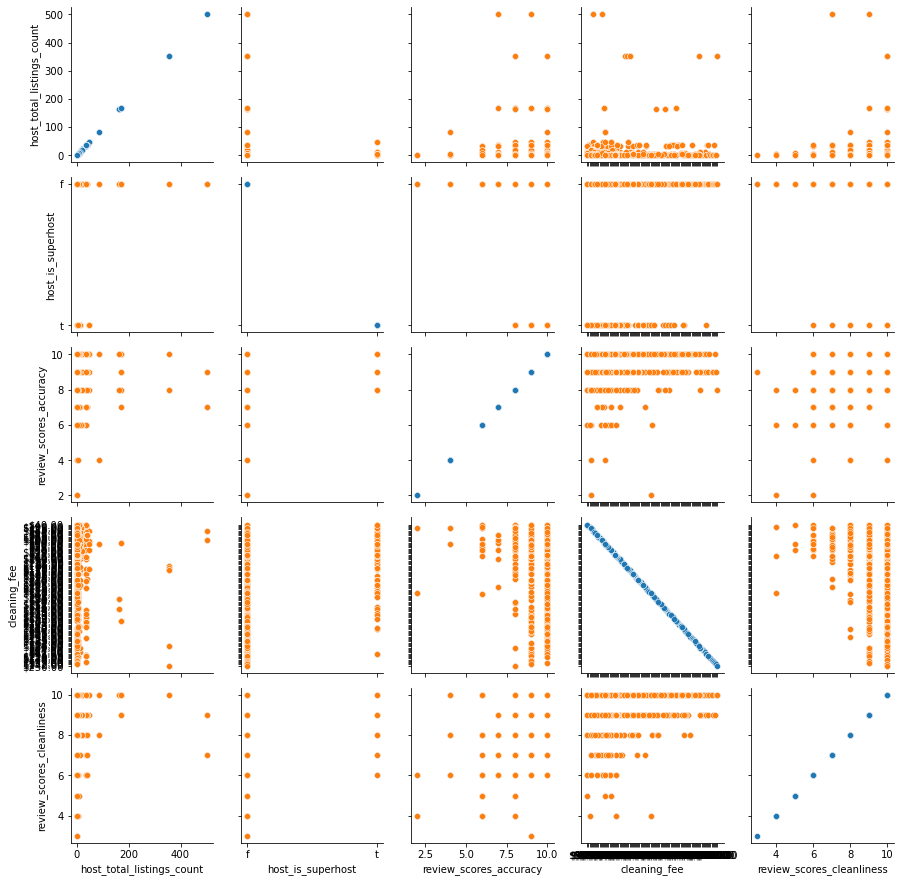

In [10]:
n_vars = ['host_total_listings_count','host_is_superhost','review_scores_accuracy', 'cleaning_fee','review_scores_cleanliness']

g = sns.PairGrid(df_listings, vars=n_vars)
g.map(sns.scatterplot)
g.map_offdiag(sns.scatterplot)

## 3. Data Preparation
Here I will do some data cleaning and wrangling to show better results.

In [29]:
# function to change columns data types easily

def change_data_type(df,columns,data_type):
    """ 
    This function converts the format of any colum provided for example from String to float. 
    The parameters are: the dataframe, column name or list of columns' names, valid pandas data type format 
    which you want to convert the column's format to 'for example String/float64..etc'. 
    """
    for i in columns:
        df[i] = df[i].astype(data_type);

    return

In [25]:
# Removing not needed columns
df_listings = df_listings.drop(['experiences_offered'], axis=1)

In [28]:
# function to remove special charcters from columns easily

def removecharacter(df,columns,character):
    """ 
    This function removes a character in a colum or list of columns. 
    parameters are: dataframe, column or list of columns, the character you want to remove 'for example $'
    """
    for i in columns:
     df[i] = df[i].str.replace(character, "");

    return

In [14]:
# remove $ currency sign and comma from price columns that I am going to use
removecharacter(df_listings,['monthly_price','weekly_price','cleaning_fee'],'$')
removecharacter(df_listings,['monthly_price','weekly_price','cleaning_fee'],',')

/Users/sara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """


In [15]:
# convert to float 
change_data_type(df_listings,['monthly_price','weekly_price','cleaning_fee'],'float64')

### Question 1: Based on scores on the locations, which areas of Seattle is the best?

Text(0.5, 1.0, '')

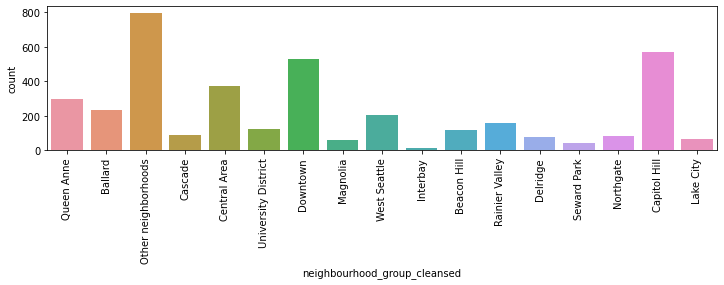

In [16]:
# plot chart
plt.figure(figsize = [12, 9])

ax = plt.subplot(3, 1, 2)
sns.countplot(data = df_listings, x = 'neighbourhood_group_cleansed')
plt.xticks(rotation = 90)
ax.set_title('')

In [17]:
a = df_listings['neighbourhood_group_cleansed'].value_counts()
a

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

As it can be seen from the figure and value counts, Downtown is the most beautiful place to stay in.

## Question 2: Which neighbourhood is the most affordable (for family/group travels) to pay for long (30 days) vacations? and which to avoid?

In [18]:
monthly_stays= df_listings[['neighbourhood', 'monthly_price', 'availability_30']]
monthly_stays

,neighbourhood,monthly_price,availability_30
0,Queen Anne,NaN,14
1,Queen Anne,3000.0,13
2,Queen Anne,NaN,1
3,Queen Anne,2300.0,0
4,Queen Anne,NaN,30
...,...,...,...
3813,Fremont,NaN,18
3814,Portage Bay,NaN,6
3815,NaN,NaN,29
3816,NaN,NaN,30


In [19]:
# Cleaning data
monthly_stays = monthly_stays.dropna(subset=['monthly_price'], how='any')

In [20]:
monthly_stays.sort_values('monthly_price')

,neighbourhood,monthly_price,availability_30
3034,Victory Heights,500.0,0
700,University District,500.0,0
381,Green Lake,520.0,0
1923,NaN,550.0,10
2443,NaN,588.0,19
...,...,...,...
529,Green Lake,13500.0,16
1138,South Lake Union,14559.0,4
1279,Belltown,14900.0,27
2518,Portage Bay,19000.0,25


In [21]:
df_expensive_month = monthly_stays[monthly_stays['monthly_price']>10000]

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Ballard'),
  Text(1, 0, 'Belltown'),
  Text(2, 0, 'Central Business District'),
  Text(3, 0, 'Green Lake'),
  Text(4, 0, 'North Beacon Hill'),
  Text(5, 0, 'Portage Bay'),
  Text(6, 0, 'Queen Anne'),
  Text(7, 0, 'South Lake Union')])

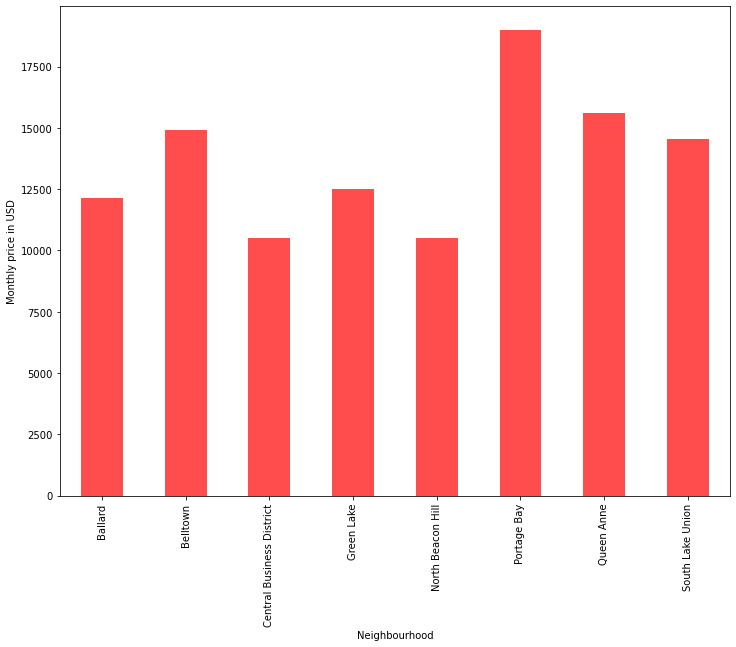

In [22]:
# plot another chart
plt.figure(figsize = [12, 9])
df_expensive_month.groupby('neighbourhood')['monthly_price'].mean().plot(kind='bar',alpha = 0.7, color='red')
plt.xlabel('Neighbourhood')
plt.ylabel('Monthly price in USD')
plt.xticks(rotation = 90)

As it can be seen from the ubove figure, we can clearly know that Portage Bay, Queen Anne, Belltown and South Lake Union are the most expensive neighbourhoods to live in.

In [23]:
df_affordable_month = monthly_stays[monthly_stays['monthly_price']<900]

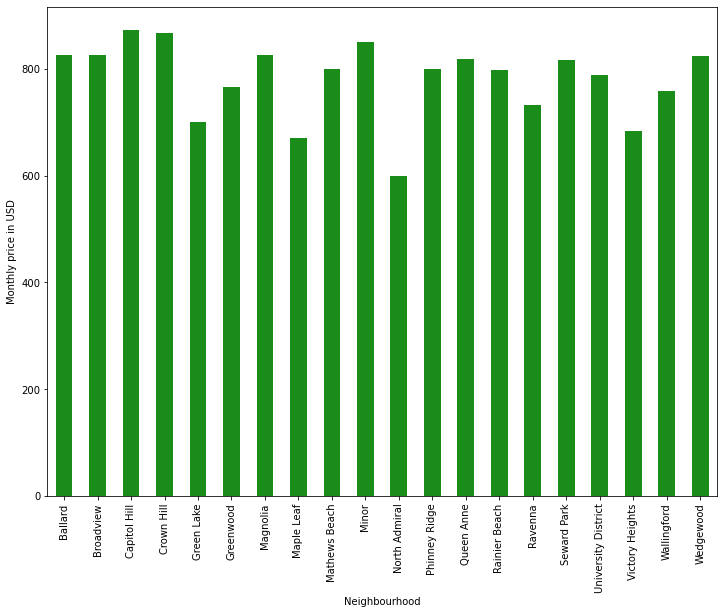

In [24]:
# plot another chart
plt.figure(figsize = [12, 9])
df_affordable_month.groupby('neighbourhood')['monthly_price'].mean().plot(kind='bar',alpha = 0.9, color='green');
plt.xlabel('Neighbourhood');
plt.ylabel('Monthly price in USD');
plt.xticks(rotation = 90);

As it can be seen from the ubove figure, we can consider living in Green Lake, North Admiral and Maple Leaf neighbourhood for low budget travellers.

### Question 3: Looking at previous visitors experience, for who paid cleaning fees, did they actually got a cleaner room than other visitors who did not pay for it?

In [25]:
# Cleaning fee is not a must in bookings therefore removing NaN values is the best approach and since I want to rely on scores, I will drop NaN values as well.
df_listings = df_listings.dropna(subset=['cleaning_fee'], how='any')
df_listings = df_listings.dropna(subset=['review_scores_cleanliness'], how='any')

Text(0, 0.5, 'Cleaning Fee $')

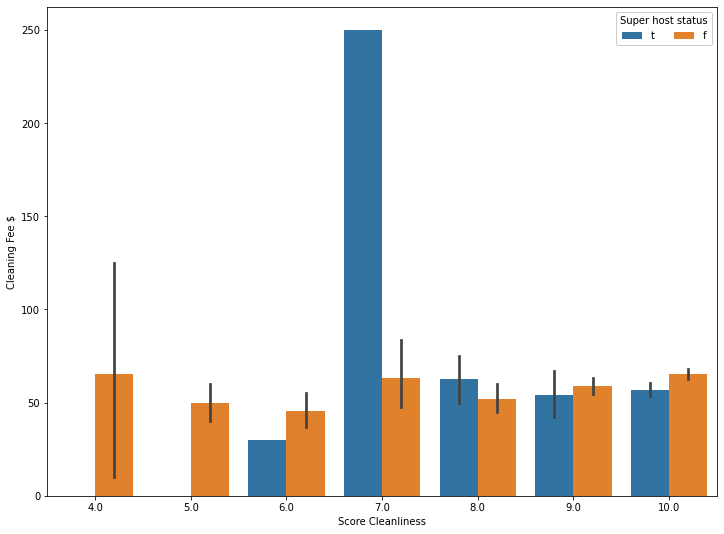

In [26]:
# plot chart

plt.figure(figsize=(12,9))
ax = sns.barplot(data = df_listings, x = 'review_scores_cleanliness', y = 'cleaning_fee' , hue = 'host_is_superhost')
ax.legend(loc = 0, ncol = 9, framealpha = 9, title = 'Super host status')
plt.xlabel('Score Cleanliness')
plt.ylabel('Cleaning Fee $')

As it can be seen from the ubove figure, blue bars represents cleaning fees and the orange represents cleanliness of the room, it is not worth it to pay for cleaning service. There is no big difference in room cleanliness for thos who paid and did not pay for it.